In [12]:
import sys
sys.path.append(r'K:\OneDrive_NJIT\OneDrive - NJIT\Research\sidewalk\yolact')
import yolact
import eval

from data import COCODetection, get_label_map, MEANS, COLORS
from yolact import Yolact
from utils.augmentations import BaseTransform, FastBaseTransform, Resize
from utils.functions import MovingAverage, ProgressBar
from layers.box_utils import jaccard, center_size
from utils import timer
from utils.functions import SavePath
from layers.output_utils import postprocess, undo_image_transformation
import pycocotools

from data import cfg, set_cfg, set_dataset

import numpy as np
import torch
import torch.backends.cudnn as cudnn
from torch.autograd import Variable
import argparse
import time
import random
import cProfile
import pickle
import json
import os
from collections import defaultdict
from pathlib import Path
from collections import OrderedDict
from PIL import Image
from natsort import natsorted
import matplotlib.pyplot as plt
import cv2
import glob

In [3]:
net = yolact.Yolact()

In [4]:
net.load_weights(r'K:\OneDrive_NJIT\OneDrive - NJIT\Research\sidewalk\yolact\weights\yolact_base_13_140000.pth')

In [22]:
net.eval()
net = net.cuda()
print(' Done.')

 Done.


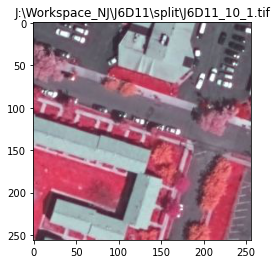

True
True
True


RuntimeError: expected device cuda:0 but got device cpu
The above operation failed in interpreter.
Traceback (most recent call last):
  File "K:\OneDrive_NJIT\OneDrive - NJIT\Research\sidewalk\yolact\layers\box_utils.py", line 263
        
        boxes = torch.cat((
            priors[:, :2] + loc[:, :2] * variances[0] * priors[:, 2:],
                            ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ <--- HERE
            priors[:, 2:] * torch.exp(loc[:, 2:] * variances[1])), 1)
        boxes[:, :2] -= boxes[:, 2:] / 2

The above operation failed in interpreter.
Traceback (most recent call last):

The above operation failed in interpreter.
Traceback (most recent call last):


In [59]:
in_img_path = r'J:\Workspace_NJ\J6D11\split'
out_path = r'I:\t'

files = glob.glob(in_img_path + r'\*.tif')
# print(files)
# eval.evalimage(net,files[0], out_path)
img_numpy = cv2.imread(files[0])

img_numpy = img_numpy[:, :, (2, 1, 0)]

plt.imshow(img_numpy)
plt.title(files[0])
plt.show()
        
# print('path:', path)
frame = torch.from_numpy(cv2.imread(files[0])).cuda().float()
print(frame.is_cuda)


batch = FastBaseTransform()(frame.unsqueeze(0))
print(batch.is_cuda)
# print(batch)
print(next(net.parameters()).is_cuda)
preds = net(batch)

# frame = torch.zeros(cv2.imread(path).shape).cuda().float()

# img_numpy = prep_display(preds, frame, None, None, undo_transform=False)    